# Data preparation

In [ ]:
import pandas as pd

# Ensure the file path is correct, using raw string or forward slashes in the path
# file_name = "C:\Users\lenovo\Desktop\churn.csv"
# or use forward slashes
# "C:\Users\lenovo\Desktop\ISOM 3360\churn.csv.csv"

try:
    df1 = pd.read_csv("C:/Users/lenovo/Desktop/churn.csv")
    print("List of columns:", df1.columns.values)
    print(df1.head())
except FileNotFoundError as e:
    print(f"Error: {e}")

Error: [Errno 2] No such file or directory: 'C:/Users/lenovo/Desktop/churn.csv'


In [ ]:
object_columns = df1.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)
# find colmuns that need to be encoded

Object columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
columns_to_encode = ['Churn','PaperlessBilling','PhoneService','Partner','Dependents','gender','TechSupport', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df1, columns=columns_to_encode, prefix=columns_to_encode,drop_first=True)

In [ ]:
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn_Yes',
       'PaperlessBilling_Yes', 'PhoneService_Yes', 'Partner_Yes',
       'Dependents_Yes', 'gender_Male', 'TechSupport_No internet service',
       'TechSupport_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114514)
#split data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test)

      SeniorCitizen  tenure  MonthlyCharges  PaperlessBilling_Yes  \
245               1       4           75.35                 False   
5387              0      35           20.10                  True   
1366              1       1           79.20                  True   
1734              0       1           69.90                  True   
820               0      47          103.10                  True   
...             ...     ...             ...                   ...   
3226              0      15           84.45                 False   
2035              0      71           90.55                 False   
1748              1      72           96.60                  True   
2797              1      32          104.90                  True   
6432              0      17           55.35                  True   

      PhoneService_Yes  Partner_Yes  Dependents_Yes  gender_Male  \
245               True        False           False         True   
5387              True        False

# Tree

# Try GridSearchCV to find best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:

rf = DecisionTreeClassifier(random_state=114514)
num_leafs = range(10,30)
# Define the parameter grid
param_grid = {
    'max_depth': np.arange(2,10,1),
    'min_samples_leaf': num_leafs,

}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}") #f1score

# Evaluate on test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Test set score: {test_score}")

Best parameters: {'max_depth': 6, 'min_samples_leaf': 13}
Best cross-validation score: 0.7897170138029982
Test set score: 0.7943127962085308


# train

In [ ]:

tree_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=13) #best choie so far
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=13)

In [ ]:
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1381  171]
 [ 263  295]]


In [ ]:
# Perform 10-fold cross-validation
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.80016659 0.84893604 0.76690068 0.82975619 0.82833943 0.79607113
 0.78858557 0.82261953 0.82782136 0.84933708]
Mean Accuracy: 0.8158533595561621


In [ ]:
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]
y_pred = tree_model.predict(X_test)


threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)



In [ ]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1381  171]
 [ 263  295]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1552
        True       0.63      0.53      0.58       558

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



AUC: 0.8289327217972877


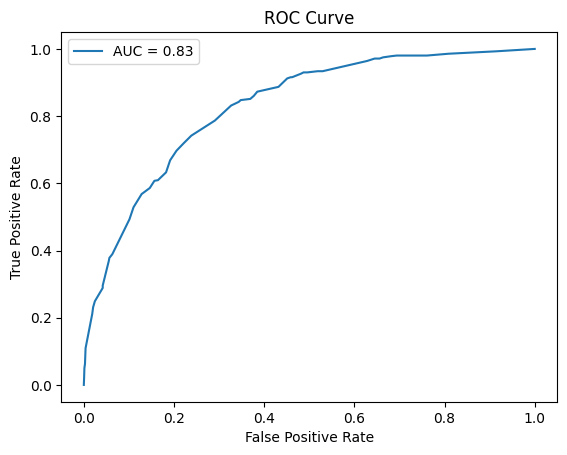

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Get feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Print top 5-10 most important features
print("Most important features:")
print(importances)



Most important features:
                                  feature  importance
1                                  tenure    0.513000
12            InternetService_Fiber optic    0.292319
2                          MonthlyCharges    0.075693
24                      Contract_One year    0.024298
25                      Contract_Two year    0.016779
8         TechSupport_No internet service    0.015631
27         PaymentMethod_Electronic check    0.014866
0                           SeniorCitizen    0.011405
3                    PaperlessBilling_Yes    0.010975
15                     OnlineSecurity_Yes    0.007664
4                        PhoneService_Yes    0.006861
17                       OnlineBackup_Yes    0.004922
7                             gender_Male    0.002459
11                      MultipleLines_Yes    0.001679
9                         TechSupport_Yes    0.001448
20        StreamingTV_No internet service    0.000000
26  PaymentMethod_Credit card (automatic)    0.000000
23 

# High- and low-probability churning customers

In [ ]:

y_pred_proba = tree_model.predict_proba(X_test)

# Define thresholds for high and low probability churners
high_threshold = 0.7
low_threshold = 0.3

# Classify customers
high_prob_churners = X_test[y_pred_proba[:, 1] >= high_threshold]
low_prob_churners = X_test[y_pred_proba[:, 1] <= low_threshold]


# Analyze characteristics
print("High-probability churners characteristics:")
print(high_prob_churners.describe(include='all'))

print("\nLow-probability churners characteristics:")
print(low_prob_churners.describe(include='all'))

High-probability churners characteristics:
        SeniorCitizen      tenure  MonthlyCharges PaperlessBilling_Yes  \
count      177.000000  177.000000      177.000000                  177   
unique            NaN         NaN             NaN                    2   
top               NaN         NaN             NaN                 True   
freq              NaN         NaN             NaN                  132   
mean         0.282486    3.644068       84.157062                  NaN   
std          0.451486    3.476035       11.858201                  NaN   
min          0.000000    1.000000       25.100000                  NaN   
25%          0.000000    1.000000       75.900000                  NaN   
50%          0.000000    2.000000       84.300000                  NaN   
75%          1.000000    5.000000       93.850000                  NaN   
max          1.000000   17.000000      110.100000                  NaN   

       PhoneService_Yes Partner_Yes Dependents_Yes gender_Male  \
co

#LogisticRegression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
# something appear but it seems normal

Cross-Validation Scores: [0.78977273 0.8125     0.80085349 0.82219061 0.77809388 0.79231863
 0.80654339 0.80512091 0.79516358 0.80085349]
Mean Accuracy: 0.8003410707358076


In [ ]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
custom_threshold = 0.5  # Set your desired threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1387  165]
 [ 238  320]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1552
        True       0.66      0.57      0.61       558

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



AUC: 0.843937063518457


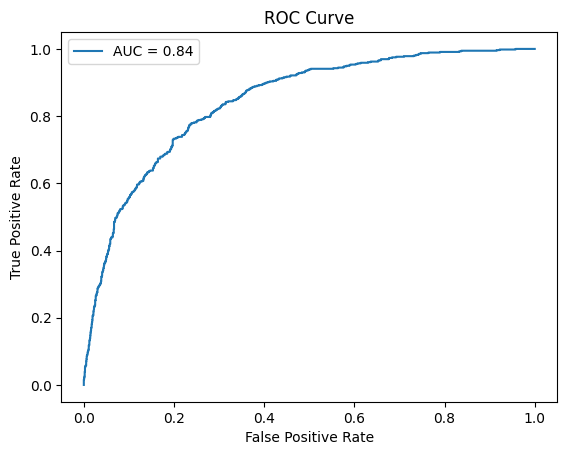

In [ ]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")


fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#lasso


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
print(X_train)

      SeniorCitizen  tenure  MonthlyCharges  PaperlessBilling_Yes  \
1643              1      60           80.95                  True   
2767              0      67           74.00                 False   
6278              0      26           83.95                  True   
512               0      56          105.45                  True   
5105              0      71          113.65                 False   
...             ...     ...             ...                   ...   
2170              0      30           85.15                 False   
759               0      22           89.25                 False   
2923              0      68           95.10                 False   
6523              1      18           20.35                 False   
1235              0       3           58.70                  True   

      PhoneService_Yes  Partner_Yes  Dependents_Yes  gender_Male  \
1643              True         True            True         True   
2767              True         True

In [ ]:

param_grid = {"C": [10**i for i in np.arange(-4, 0, 0.1)]}

# Initialize the Logistic Regression model with L1 penalty
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lasso_log_reg, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X, y)

# Retrieve the best parameters and model
best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

print(f"Best C: {best_C}")
print(f"Best model: {best_model}")


Best C: 0.050118723362727505
Best model: LogisticRegression(C=0.050118723362727505, penalty='l1', solver='liblinear')


In [ ]:


# Predict on the test set
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.050118723362727505)
lasso_log_reg.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_log_reg.predict(X_test_scaled)


y_pred = lasso_log_reg.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)





Confusion Matrix:
 [[1397  155]
 [ 251  307]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.66      0.55      0.60       558

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



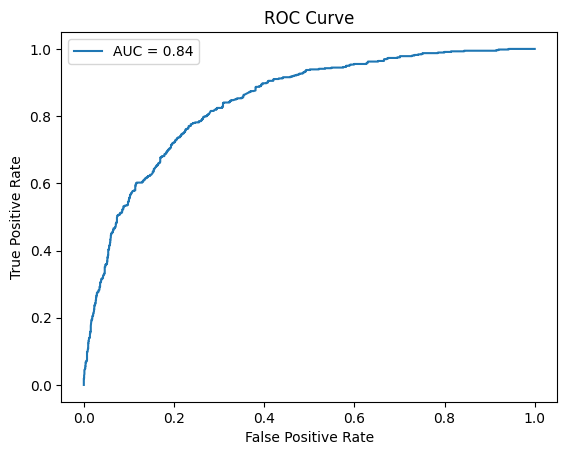

In [ ]:
lasso_probabilities = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, lasso_probabilities)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
coefficients = lasso_log_reg.coef_[0]
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importances['Absolute Coefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False)
print("Top features from Logistic Regression (Lasso):")
print(feature_importances.head(10))

Top features from Logistic Regression (Lasso):
                             Feature  Coefficient  Absolute Coefficient
1                             tenure    -0.813585              0.813585
25                 Contract_Two year    -0.480696              0.480696
12       InternetService_Fiber optic     0.430273              0.430273
24                 Contract_One year    -0.242672              0.242672
15                OnlineSecurity_Yes    -0.177453              0.177453
16  OnlineBackup_No internet service    -0.152846              0.152846
3               PaperlessBilling_Yes     0.132466              0.132466
27    PaymentMethod_Electronic check     0.113969              0.113969
9                    TechSupport_Yes    -0.112674              0.112674
23               StreamingMovies_Yes     0.106173              0.106173


In [ ]:
# Get feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Print top 5-10 most important features
print("Most important features:")
print(importances)

Most important features:
                                  feature  importance
1                                  tenure    0.513000
12            InternetService_Fiber optic    0.292319
2                          MonthlyCharges    0.075693
24                      Contract_One year    0.024298
25                      Contract_Two year    0.016779
8         TechSupport_No internet service    0.015631
27         PaymentMethod_Electronic check    0.014866
0                           SeniorCitizen    0.011405
3                    PaperlessBilling_Yes    0.010975
15                     OnlineSecurity_Yes    0.007664
4                        PhoneService_Yes    0.006861
17                       OnlineBackup_Yes    0.004922
7                             gender_Male    0.002459
11                      MultipleLines_Yes    0.001679
9                         TechSupport_Yes    0.001448
20        StreamingTV_No internet service    0.000000
26  PaymentMethod_Credit card (automatic)    0.000000
23 

# Task 2

In [ ]:
#calculating the cost
tree_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=13) #best choie so far
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, tree_y_pred)
print(cm)

false_negatives_indices = np.where((y_test == 1) & (tree_y_pred == 0))[0]
false_positives_indices = np.where((y_test == 0) & (tree_y_pred == 1))[0]


false_negatives_rows = X_test.iloc[false_negatives_indices]
false_positives_rows = X_test.iloc[false_positives_indices]

number_of_FN = len(false_negatives_rows)
number_of_FP = len(false_positives_rows)

loss_of_tree = np.sum(false_negatives_rows.MonthlyCharges)*12 -205*number_of_FN+number_of_FP*205
print(f"cost of tree : {loss_of_tree}")

#-------------------------------------------------------------------------------------------------
# lasso
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.050118723362727505)
lasso_log_reg.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_log_reg.predict(X_test_scaled)
false_negatives = np.where((y_test == 1) & (lasso_y_pred == 0))
false_positives = np.where((y_test == 0) & (lasso_y_pred == 1))

cm = confusion_matrix(y_test, lasso_y_pred)
print(cm)
FP = cm[0, 1]
FN = cm[1, 0]

false_negatives_indices = np.where((y_test == 1) & (lasso_y_pred == 0))[0]
false_positives_indices = np.where((y_test == 0) & (lasso_y_pred == 1))[0]

false_negatives_rows = X_test.iloc[false_negatives_indices]
false_positives_rows = X_test.iloc[false_positives_indices]

number_of_FN = len(false_negatives_rows)
number_of_FP = len(false_positives_rows)

loss_of_lasso = np.sum(false_negatives_rows.MonthlyCharges)*12 -205*number_of_FN+number_of_FP*205
print(f"cost of lasso {loss_of_lasso}")



[[1381  171]
 [ 263  295]]
cost of tree : 197138.80000000002
[[1397  155]
 [ 251  307]]
cost of lasso 185011.19999999998


In [ ]:
print(len(false_negatives_rows))

251


In [ ]:

lasso_probabilities = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]

# Set your desired threshold
threshold = 0.28 # Example threshold

# Adjust predictions based on the threshold
lasso_y_pred_adjusted = (lasso_probabilities >= threshold).astype(int)


cm_adjusted = confusion_matrix(y_test, lasso_y_pred_adjusted)
print(cm_adjusted)


[[1135  417]
 [ 112  446]]


In [ ]:
#finding best threshold
def calculate_cost(y_true, y_pred_proba, threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate confusion matrix elements
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    false_negatives_indices = np.where((y_test == 1) & (y_pred == 0))[0]

    false_negatives_rows = X_test.iloc[false_negatives_indices]

    # Calculate costs
    # Cost of false negatives: loss of contract value
    cost_FN = np.sum(false_negatives_rows.MonthlyCharges) * 12 - 205 * FN
    # Cost of false positives: cost of sending retention offers
    cost_FP = 205 * FP
    total_cost = cost_FN + cost_FP
    return total_cost


thresholds = np.arange(0.0, 1.0, 0.01)

# Initialize variables to store the best cost and threshold
best_cost_tree = float('inf')
best_cost_lasso = float('inf')
best_threshold_of_tree = 0
best_threshold_of_lasso = 0

# Calculate costs for both models
for threshold in thresholds:
    # Decision Tree
    tree_cost = calculate_cost(y_test, tree_model.predict_proba(X_test)[:, 1],  threshold)

    # Lasso Logistic Regression
    lasso_cost = calculate_cost(y_test, lasso_log_reg.predict_proba(X_test_scaled)[:, 1],  threshold)

    # Update best cost and threshold for Decision Tree
    if tree_cost < best_cost_tree:
        best_cost_tree = tree_cost
        best_threshold_of_tree = threshold

    # Update best cost and threshold for Lasso
    if lasso_cost < best_cost_lasso:
        best_cost_lasso = lasso_cost
        best_threshold_of_lasso = threshold

print(f"Best tree Threshold: {best_threshold_of_tree}")
print(f"Minimal tree Total Cost: {best_cost_tree}")
print(f"Best lasso Threshold: {best_threshold_of_lasso}")
print(f"Minimal lasso Total Cost: {best_cost_lasso}")

Best tree Threshold: 0.28
Minimal tree Total Cost: 164438.6
Best lasso Threshold: 0.31
Minimal lasso Total Cost: 151238.59999999998


# compare data-driven solutions with two baselines strategies

In [ ]:
#doing nothing can mean predict all customer will not churn
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.050118723362727505)
lasso_log_reg.fit(X_train_scaled, y_train)
lasso_y_proba = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]

custom_threshold = 1
y_pred_custom = (lasso_y_proba >= custom_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_custom)
print(cm)
false_negatives_indices = np.where((y_test == 1) & (y_pred_custom == 0))[0]

false_negatives_rows = X_test.iloc[false_negatives_indices]
print(len(false_negatives_rows))

[[1552    0]
 [ 558    0]]
558


In [ ]:
# doing nothing
# seems wrong modifie later
#need -205
cost_doing_nothing = np.sum(false_negatives_rows.MonthlyCharges)*12-205*len(false_negatives_rows)
print(f"cost of doing nothing: {cost_doing_nothing}")

# send everyone
cost_sending_everyone = 205*len(X_test)
print(f"cost of sending retention to everyone: {cost_sending_everyone}")

# So data-driven solutions are better,cause the cost of data-driven solutions are lower.

NameError: name 'np' is not defined

In [ ]:
proba_of_tree = tree_model.predict_proba(X_test)[:, 1]
proba_of_lasso = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]
a = X_test.MonthlyCharges*12*proba_of_lasso-205
send_indic = np.where((a > 0))[0]
send = X_test.iloc[send_indic]
cost_of_lasso = 205*len(send)
print(f"cost_of_lasso is {cost_of_lasso}")


b = X_test.MonthlyCharges*12*proba_of_tree-205
send_indic = np.where((b > 0))[0]
send = X_test.iloc[send_indic]
cost_of_tree = 205*len(send)
print(f"cost_of_tree is {cost_of_tree}")

cost_of_lasso is 183270
cost_of_tree is 183475


In [ ]:
# Conclusions
if best_cost_tree < cost_doing_nothing and best_cost_tree < cost_sending_everyone:
    print("The Decision Tree model is better than both baseline strategies.")
else:
    print("The Decision Tree model is not better than both baseline strategies.")

if best_cost_lasso < cost_doing_nothing and best_cost_lasso < cost_sending_everyone:
    print("The Lasso Regression model is better than both baseline strategies.")
else:
    print("The Lasso Regression model is not better than both baseline strategies.")

The Decision Tree model is better than both baseline strategies.
The Lasso Regression model is better than both baseline strategies.
